In [1]:
%matplotlib inline

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib import colors
# import pysal as ps
from pysal.viz import mapclassify as mc
import numpy as np

from scipy.stats import shapiro


/home/calvin/Env/chicago_project-AhtyV_Ks/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


# Load Analysis Ready Dataset

This analysis ready dataset was generated from the following individual sets of data. These include:
<ul>
    <li><strong>Chicago</strong> - ESRI Shapefile for the City of Chicago, subdivided into 77 communities.</li>
    <li><strong>Sex Crimes</strong> - A CSV file containing reported Sexual Offences (and their GPS locations), that have been extracted from a larger crimes dataset for the City of Chicago</li>
    <li><strong>SocioEconomic Indicators</strong> - A csv file containing selected indicators showing the social and economic indicators for the communities within City of Chicago</li>
    <li><strong>Sexually Transmitted Infections</strong> - A csv file of reported Gonorrhoea and Chlamydia cases within the communities of the larger City of Chicago</li>
</ul>
   

For on overview of the processes and joining of the datasets to get this final analysis ready dataset, do have a look at [01-Preliminary-Data-Exploration](01-Preliminary-Data-Exploration.ipynb).

In [3]:
# Read in our analysis ready data
ChicagoData = gpd.read_file('./data/analysis_ready_data/ChicagoData.shp')

In [4]:
ChicagoData.columns

Index(['OBJECTID', 'community', 'area', 'AreaNum', 'Shape_Leng', 'Shape_Area',
       'tot_2010', 'tot_2011', 'tot_2012', 'tot_2013', 'tot_2014', 'Total_STD',
       'PHC', 'PHHBP', 'P16UnEmp', 'P25NoDip', 'PU18O64', 'PerCapInc',
       'HshipIdx', 'SexCrimes', 'geometry'],
      dtype='object')

In [5]:
ChicagoData.head()

OBJECTID       community          area  AreaNum    Shape_Leng  \
0      14.0     Albany Park  4.974256e+06       14  11990.556216   
1      54.0  Archer Heights  5.195392e+06       57   9717.049840   
2      35.0   Armour Square  2.579574e+06       34   9737.952509   
3      69.0         Ashburn  1.258473e+07       70  16708.606729   
4      70.0  Auburn Gresham  9.760930e+06       71  14251.782173   

     Shape_Area  tot_2010  tot_2011  tot_2012  tot_2013  ...  Total_STD   PHC  \
0  4.974256e+06        49        62        63        74  ...        317  11.3   
1  5.195392e+06         8        15         8        15  ...         68   8.5   
2  2.579574e+06        19        18        25        34  ...        118   5.7   
3  1.258473e+07       109       137       131       132  ...        642   4.0   
4  9.760930e+06       332       423       383       386  ...       1833   4.0   

   PHHBP  P16UnEmp  P25NoDip  PU18O64  PerCapInc  HshipIdx  SexCrimes  \
0   19.2      10.0      32.9     32.0      21323        53         43   
1   14.1      16.5      35.9     39.2      16134        67         10   
2   40.1      16.7      34.5     38.3      16148        82          5   
3   10.4      11.7      17.7     36.9      23482        37         41   
4   27.6      28.3      18.5     41.9      15528        74        128   

                                            geometry  
0  POLYGON ((352158.014 589356.544, 352159.010 58...  
1  POLYGON ((351419.900 572966.363, 351420.841 57...  
2  POLYGON ((358480.181 575188.480, 358455.481 57...  
3  POLYGON ((351626.327 565336.779, 351628.880 56...  
4  POLYGON ((357669.019 565250.585, 357669.304 56...  

[5 rows x 21 columns]

# Exploratory Spatial Data Analysis

### Map of STI Prevalence in the City of Chicago

In [6]:
# Generate deciles
q10_total = mc.Quantiles(ChicagoData.Total_STD, k=10)
q10_total.bins

array([  59.6,  119.2,  200. ,  306.2,  354. ,  574.4,  853.2, 1069.2,
       1625. , 4166. ])

In [7]:
q10_total.yb

array([4, 1, 1, 6, 9, 9, 4, 4, 6, 3, 2, 3, 2, 4, 8, 8, 1, 5, 1, 8, 2, 7,
       0, 8, 0, 1, 4, 2, 7, 8, 0, 2, 8, 3, 5, 1, 5, 9, 5, 3, 6, 4, 5, 1,
       0, 5, 0, 6, 3, 9, 7, 2, 9, 0, 0, 0, 3, 4, 2, 2, 7, 9, 6, 4, 6, 9,
       8, 6, 6, 1, 9, 7, 3, 7, 5, 8, 7])

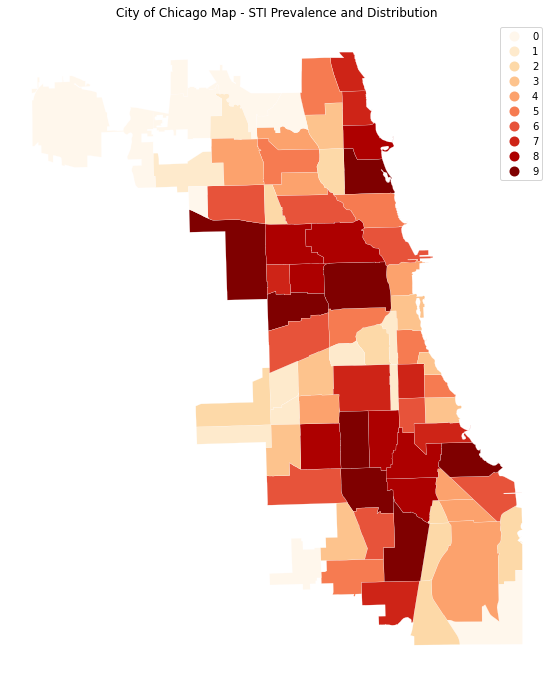

In [8]:
# Plot the data with Deciles. k=10
f,ax = plt.subplots(1, figsize=(12,12))
ChicagoData.assign(c1=q10_total.yb).plot(column='c1', categorical=True, k=10, cmap='OrRd', linewidth=0.2, ax=ax, edgecolor='white', legend=True)
ax.set_title('City of Chicago Map - STI Prevalence and Distribution')
ax.set_axis_off()
# plt.savefig("chicago_std_prevalence.png", bbox_inches="tight")
plt.show()

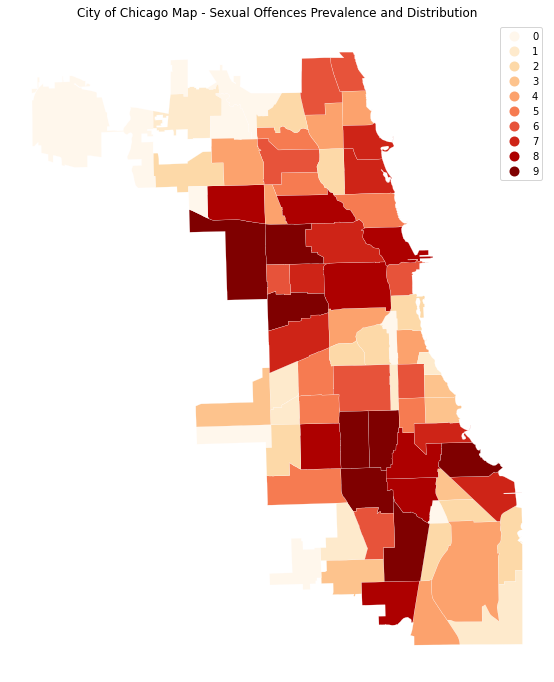

In [9]:
q10_sex_crimes = mc.Quantiles(ChicagoData.SexCrimes, k=10)

# Plot the data with Deciles. k=10
f,ax = plt.subplots(1, figsize=(12,12))
ChicagoData.assign(c1=q10_sex_crimes.yb).plot(column='c1', categorical=True, k=10, cmap='OrRd', linewidth=0.2, ax=ax, edgecolor='white', legend=True)
ax.set_title('City of Chicago Map - Sexual Offences Prevalence and Distribution')
ax.set_axis_off()
plt.show()

In [10]:
# Dataset = ChicagoData.iloc[:,12:20]
Dataset = ChicagoData.loc[:,['Total_STD','PHC','PHHBP','P16UnEmp','P25NoDip','PU18O64','PerCapInc','HshipIdx','SexCrimes','geometry']]

Dataset.columns

Index(['Total_STD', 'PHC', 'PHHBP', 'P16UnEmp', 'P25NoDip', 'PU18O64',
       'PerCapInc', 'HshipIdx', 'SexCrimes', 'geometry'],
      dtype='object')

Variable Description:
<ul>
    <li>Total_STD: Dependent Variable - Represent the total number of reported chlamydia and gonorrhoea cases</li>
    <li>PHC: - Percentage of housing establishments that are crowded.</li>
    <li>PHHBP: - Percentage of households below poverty.</li>
    <li>P16UnEmp: - Percentage of the population aged 16 years and above and are unemployed.</li>
    <li>P25NoDip: - Percentage of the population aged 25 years and above and have no high school diploma.</li>
    <li>PU18O64: - Percentage of the population aged below 18 years and above 64 years.</li>
    <li>PerCapInc: - Per Capita Income for the community.</li>
    <li>HshipIdx: - Hardship index for the community.</li>
    <li>SexCrimes: - Total count of reported sexual offences per community.</li>
</ul>

In [11]:
# Data profiling
Dataset.describe()

Total_STD        PHC      PHHBP   P16UnEmp   P25NoDip    PU18O64  \
count    77.000000  77.000000  77.000000  77.000000  77.000000  77.000000   
mean    648.870130   4.923377  21.766234  15.372727  20.341558  35.746753   
std     695.741867   3.682887  11.529957   7.543412  11.823152   7.327716   
min       7.000000   0.300000   3.300000   4.700000   2.500000  13.500000   
25%     183.000000   2.300000  13.200000   9.200000  11.800000  32.000000   
50%     354.000000   3.800000  18.900000  13.900000  18.500000  38.100000   
75%     984.000000   6.800000  29.200000  20.000000  26.600000  40.500000   
max    4166.000000  15.800000  56.500000  35.900000  54.800000  51.500000   

          PerCapInc   HshipIdx   SexCrimes  
count     77.000000  77.000000   77.000000  
mean   25563.168831  49.506494   51.090909  
std    15293.098259  28.690556   47.570220  
min     8201.000000   1.000000    1.000000  
25%    15754.000000  25.000000   17.000000  
50%    21323.000000  50.000000   39.000000  
75%    28887.000000  74.000000   75.000000  
max    88669.000000  98.000000  272.000000

Distribution plots

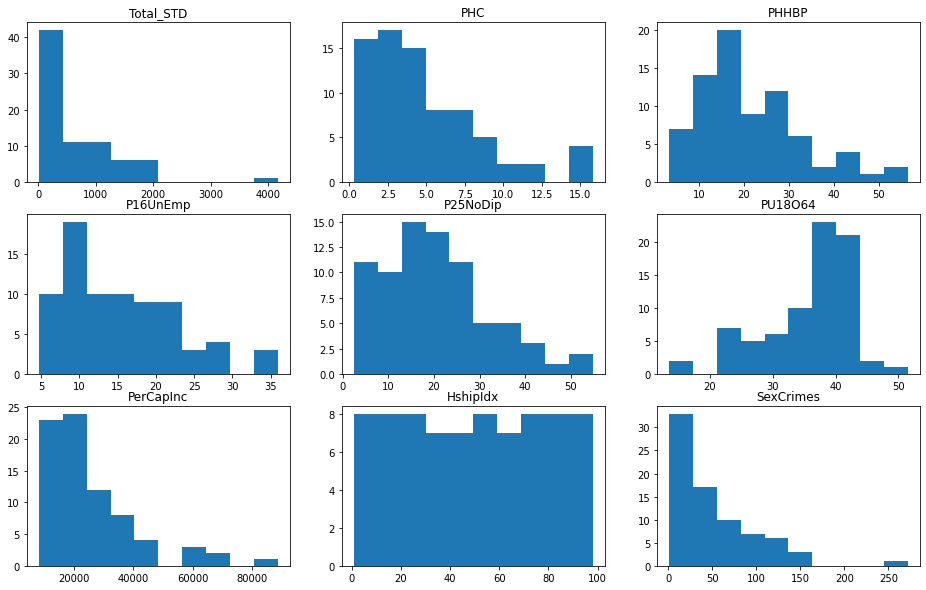

In [12]:
# Use histogram plots of the variables to visually check for the normality in distribution assumption
fig = plt.figure(figsize=(16,10))
for idx, col in enumerate(Dataset.iloc[:,0:9].columns):
#     print(f'index = {idx} and column head = {col}')
    plt.subplot(3,3,idx+1)
    plt.hist(Dataset[col])
    plt.title(col)
plt.show()

In [13]:
def normalityTest(data, alpha=0.05):
    """
    A function that runs a Shapiro-Wilks normality of distribution test on sample dataset.
    
    Hypothesis
    ============
    H0 = 'Sample data is not normally distributed'
    Ha = 'Data is normally distributed'
    
    Aim
    === Reject H0 if p_value (p) is less than alpha.
    
    Parameters
    ==========
    data : An array or dataframe (required)
    
    alpha: Optional default = 0.05; 
           A threshold value for determining level of confdence in the statistics computed. (default but )
           
    Returns
    =======
    stat: float
        Shapiro-Wilks statistic
        
    p : float
        A probability statistic value (p-value) to be compared with alpha for hypothesis testing.
        
    conc: string
        A conclusion derived from comparison of alpha and p-value based on the hypothesis being tested.
    """
    stat,p = shapiro(data)
    if p > alpha:
        conc = 'Data looks Gaussian (fail to reject H0)'
    else:
        conc = 'Data does not look Gaussian (reject H0)'
        
    #     f'Statistics = {stat:.5f}, p value = {p:.5f} : Conclusion - {p_}'
    return stat,p,conc

In [14]:
for col in Dataset.iloc[:,0:9].columns:
    stat,p,conc = normalityTest(Dataset[col])
    print(f'{col} : Statistic = {stat:.5f}, p value = {p:.5f} : Conclusion - {conc}')


Total_STD : Statistic = 0.78559, p value = 0.00000 : Conclusion - Data does not look Gaussian (reject H0)
PHC : Statistic = 0.88309, p value = 0.00000 : Conclusion - Data does not look Gaussian (reject H0)
PHHBP : Statistic = 0.94803, p value = 0.00334 : Conclusion - Data does not look Gaussian (reject H0)
P16UnEmp : Statistic = 0.94082, p value = 0.00137 : Conclusion - Data does not look Gaussian (reject H0)
P25NoDip : Statistic = 0.95547, p value = 0.00879 : Conclusion - Data does not look Gaussian (reject H0)
PU18O64 : Statistic = 0.90397, p value = 0.00003 : Conclusion - Data does not look Gaussian (reject H0)
PerCapInc : Statistic = 0.81109, p value = 0.00000 : Conclusion - Data does not look Gaussian (reject H0)
HshipIdx : Statistic = 0.95457, p value = 0.00780 : Conclusion - Data does not look Gaussian (reject H0)
SexCrimes : Statistic = 0.84089, p value = 0.00000 : Conclusion - Data does not look Gaussian (reject H0)


From visual and statistical evaluation, the dataset looks skewed and not normally distributed. This therefore calls for the transformation of the data. A log transformation 

In [15]:
# Normality test for log-transformed data
for col in Dataset.iloc[:,0:9].columns:
    stat,p,conc = normalityTest(np.log(Dataset[col]))
    print(f'{col} : Statistic = {stat:.5f}, p value = {p:.5f} : Conclusion - {conc}')

Total_STD : Statistic = 0.96667, p value = 0.04084 : Conclusion - Data does not look Gaussian (reject H0)
PHC : Statistic = 0.97686, p value = 0.17289 : Conclusion - Data looks Gaussian (fail to reject H0)
PHHBP : Statistic = 0.96698, p value = 0.04268 : Conclusion - Data does not look Gaussian (reject H0)
P16UnEmp : Statistic = 0.97644, p value = 0.16301 : Conclusion - Data looks Gaussian (fail to reject H0)
P25NoDip : Statistic = 0.93394, p value = 0.00060 : Conclusion - Data does not look Gaussian (reject H0)
PU18O64 : Statistic = 0.82908, p value = 0.00000 : Conclusion - Data does not look Gaussian (reject H0)
PerCapInc : Statistic = 0.97047, p value = 0.06990 : Conclusion - Data looks Gaussian (fail to reject H0)
HshipIdx : Statistic = 0.84245, p value = 0.00000 : Conclusion - Data does not look Gaussian (reject H0)
SexCrimes : Statistic = 0.95559, p value = 0.00893 : Conclusion - Data does not look Gaussian (reject H0)


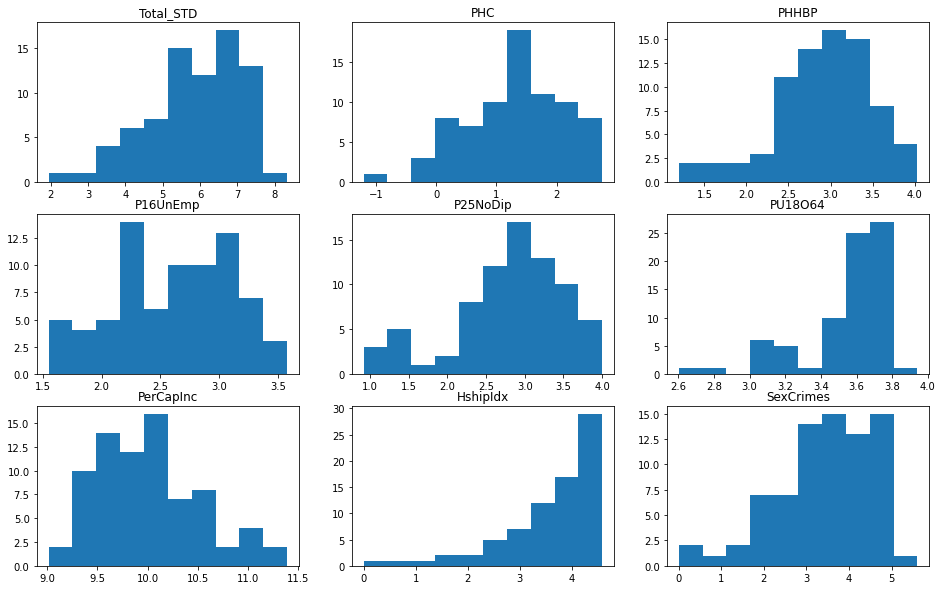

In [16]:
# Visual check through histograms
fig = plt.figure(figsize=(16,10))
for idx, col in enumerate(Dataset.iloc[:,0:9].columns):
#     print(f'index = {idx} and column head = {col}')
    plt.subplot(3,3,idx+1)
    plt.hist(np.log(Dataset[col]))
    plt.title(col)
plt.show()

From the assumption of normality tests statistics and through visual inspection of the original and transformed data, it is rather clear that the log transformation of <strong>HshipIdx</strong> variable is severely skewed. For the purposes of this article, the original form of the variable will be used while the log-transformed versions of the other variables provide for a better version, and therefore will also be used.

In [17]:
# Dataset.iloc[:,0:8].columns
# for col in Dataset.iloc[:,0:7].columns:
for col in Dataset.iloc[:,0:9].columns:
    new_head = 'log_'+col
    Dataset[new_head] = np.log(Dataset[col])
Dataset.head()

Total_STD   PHC  PHHBP  P16UnEmp  P25NoDip  PU18O64  PerCapInc  HshipIdx  \
0        317  11.3   19.2      10.0      32.9     32.0      21323        53   
1         68   8.5   14.1      16.5      35.9     39.2      16134        67   
2        118   5.7   40.1      16.7      34.5     38.3      16148        82   
3        642   4.0   10.4      11.7      17.7     36.9      23482        37   
4       1833   4.0   27.6      28.3      18.5     41.9      15528        74   

   SexCrimes                                           geometry  \
0         43  POLYGON ((352158.014 589356.544, 352159.010 58...   
1         10  POLYGON ((351419.900 572966.363, 351420.841 57...   
2          5  POLYGON ((358480.181 575188.480, 358455.481 57...   
3         41  POLYGON ((351626.327 565336.779, 351628.880 56...   
4        128  POLYGON ((357669.019 565250.585, 357669.304 56...   

   log_Total_STD   log_PHC  log_PHHBP  log_P16UnEmp  log_P25NoDip  \
0       5.758902  2.424803   2.954910      2.302585      3.493473   
1       4.219508  2.140066   2.646175      2.803360      3.580737   
2       4.770685  1.740466   3.691376      2.815409      3.540959   
3       6.464588  1.386294   2.341806      2.459589      2.873565   
4       7.513709  1.386294   3.317816      3.342862      2.917771   

   log_PU18O64  log_PerCapInc  log_HshipIdx  log_SexCrimes  
0     3.465736       9.967542      3.970292       3.761200  
1     3.668677       9.688684      4.204693       2.302585  
2     3.645450       9.689551      4.406719       1.609438  
3     3.608212      10.063989      3.610918       3.713572  
4     3.735286       9.650400      4.304065       4.852030

In [18]:
# Transformed dataset
# Dataset_trans = Dataset.iloc[:,[10,11,12,13,14,15,16,18,7,9]]
Dataset_trans = Dataset.loc[:,['log_Total_STD', 'log_PHC', 'log_PHHBP', 'log_P16UnEmp', 'log_P25NoDip',
       'log_PU18O64', 'log_PerCapInc', 'log_SexCrimes', 'HshipIdx','geometry']]
Dataset_trans.columns

Index(['log_Total_STD', 'log_PHC', 'log_PHHBP', 'log_P16UnEmp', 'log_P25NoDip',
       'log_PU18O64', 'log_PerCapInc', 'log_SexCrimes', 'HshipIdx',
       'geometry'],
      dtype='object')

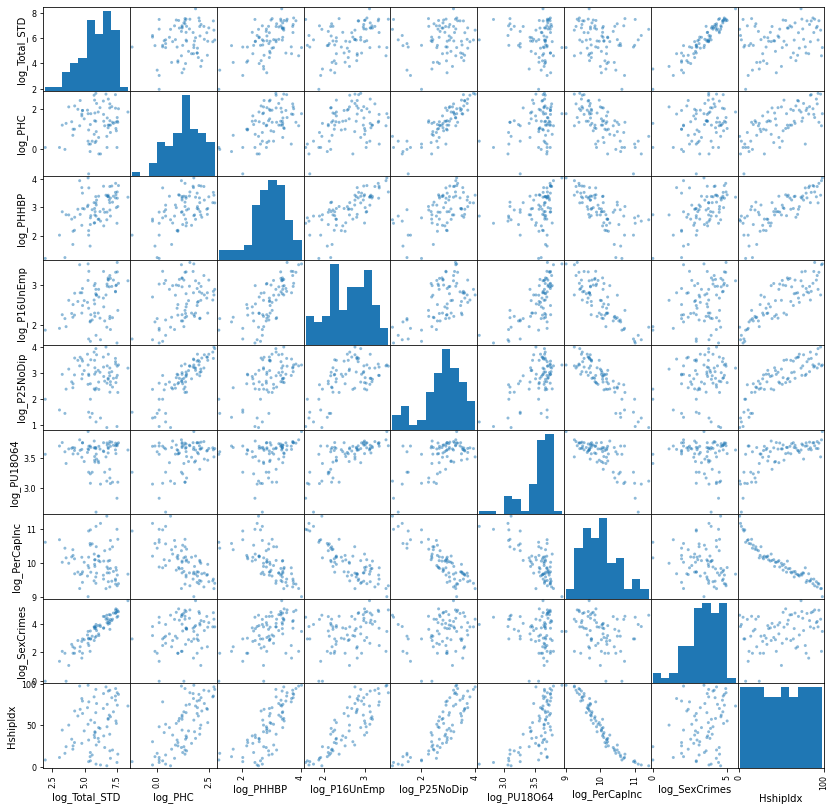

In [19]:
# Scatter matrix
pd.plotting.scatter_matrix(Dataset_trans, figsize=(14,14))
plt.show()

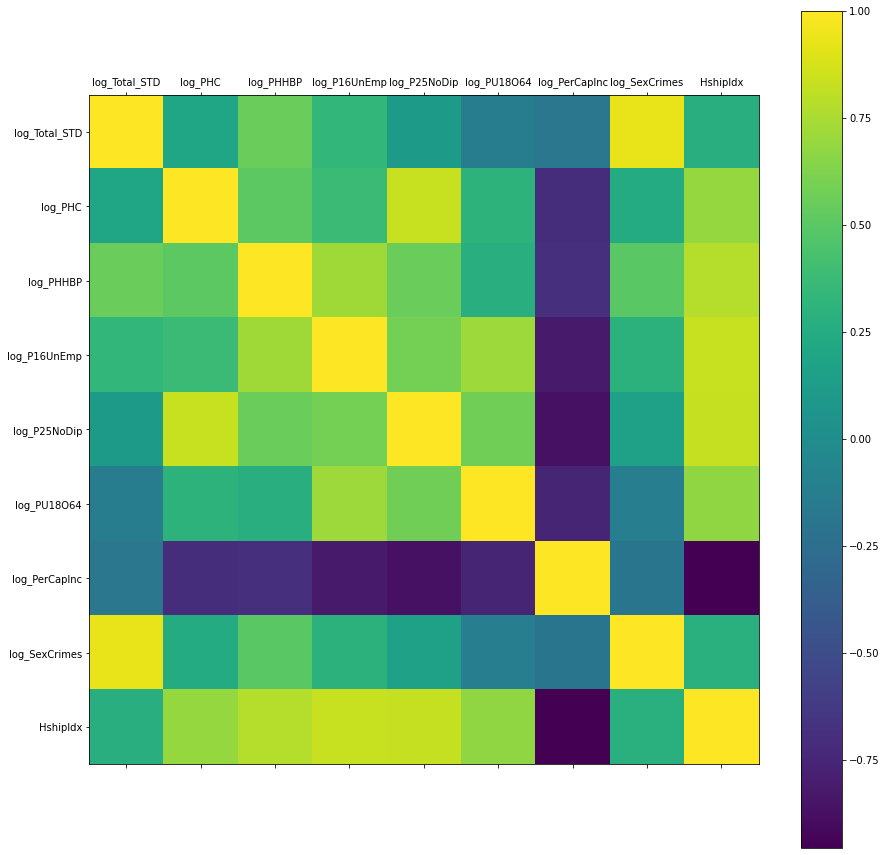

In [20]:
# Directly plot a correlaton matrix plot
plt.figure(figsize=(15,15))
plt.matshow(Dataset_trans.corr(), fignum=1)
plt.xticks(range(len(Dataset_trans.columns)-1), Dataset_trans.columns)
plt.yticks(range(len(Dataset_trans.columns)-1), Dataset_trans.columns)
plt.colorbar()
plt.show()

In [21]:
### Pearson Correlation Coefficients
Dataset_trans.corr()

log_Total_STD   log_PHC  log_PHHBP  log_P16UnEmp  log_P25NoDip  \
log_Total_STD       1.000000  0.192706   0.552177      0.339440      0.109920   
log_PHC             0.192706  1.000000   0.508860      0.376271      0.839159   
log_PHHBP           0.552177  0.508860   1.000000      0.724364      0.552125   
log_P16UnEmp        0.339440  0.376271   0.724364      1.000000      0.594001   
log_P25NoDip        0.109920  0.839159   0.552125      0.594001      1.000000   
log_PU18O64        -0.134639  0.307001   0.281395      0.716024      0.575029   
log_PerCapInc      -0.181499 -0.699264  -0.682156     -0.814582     -0.868975   
log_SexCrimes       0.934110  0.249684   0.496422      0.302215      0.164479   
HshipIdx            0.275893  0.687635   0.778913      0.836826      0.828553   

               log_PU18O64  log_PerCapInc  log_SexCrimes  HshipIdx  
log_Total_STD    -0.134639      -0.181499       0.934110  0.275893  
log_PHC           0.307001      -0.699264       0.249684  0.687635  
log_PHHBP         0.281395      -0.682156       0.496422  0.778913  
log_P16UnEmp      0.716024      -0.814582       0.302215  0.836826  
log_P25NoDip      0.575029      -0.868975       0.164479  0.828553  
log_PU18O64       1.000000      -0.750306      -0.119710  0.673892  
log_PerCapInc    -0.750306       1.000000      -0.196160 -0.955456  
log_SexCrimes    -0.119710      -0.196160       1.000000  0.284545  
HshipIdx          0.673892      -0.955456       0.284545  1.000000

Using a threshold value of <strong>0.75</strong> High correlation coefficients exist between:
<ul>
    <li>Between log_PHC and log_P25NoDip with a value of 0.839159 representing 83.92% correlation.</li>
    <li>Between log_PHHBP and HshipIdx with a value of 0.778913.</li>
    <li>Between log_P16UnEmp and Log_PerCapInc with a value of 0.814582.</li>
    <li>Between log_P16UnEmp and HshipIdx with a value of 0.836826.</li>
    <li>Between log_P25NoDip and Log_PerCapInc with a value of -0.868975</li>
    <li>Between log_P25NoDip and HshipIdx with a value of 0.828553.</li>
    <li>Between log_PU18O64 and Log_PerCapInc with a value of -0.750306.</li>
    <li>Between log_PHLog_PerCapInc and HshipIdx with a value of 0.955456.</li>
</ul>

<strong> NOTE: </strong>

A high correlation coefficient between log_STD and log_SexCrimes (between dependent and independent variables) indicates the importance or influence the independent variable towards the dependent variable. This basically means, log_SexCrimes is <strong>important</strong> in determining the spread of or counts of reported STD cases in a community and in the City.

## Write out this analysis ready data as a shapefile

In [22]:
# rename the columns - to conform to the 10-char limit with shapefiles
new_cols = {'log_Total_STD': 'log_STD', 'log_P16UnEmp':'logP16UnEm', 'log_P25NoDip':'logP25NoDi',
       'log_PU18O64':'logPU18O64', 'log_PerCapInc':'logPaCapIn', 'log_SexCrimes':'logSexCrim'}

Dataset_trans.rename(columns=new_cols, inplace=True)
Dataset_trans.columns

Index(['log_STD', 'log_PHC', 'log_PHHBP', 'logP16UnEm', 'logP25NoDi',
       'logPU18O64', 'logPaCapIn', 'logSexCrim', 'HshipIdx', 'geometry'],
      dtype='object')

In [23]:
Dataset_trans.to_file(filename='./data/analysis_ready_data/log_transformed_ChicagoData.shp', driver='ESRI Shapefile')